# **Importing necessary libraries**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


# Loading the Iris dataset

In [4]:
file_path = '/content/drive/MyDrive/ColabNotebooks/iris.data'
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Class']
iris = pd.read_csv(file_path, names=columns)

print(iris.head(10))

   sepal_length  sepal_width  petal_length  petal_width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [17]:
# Divide the data set into features (X) and target variable (y)
X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

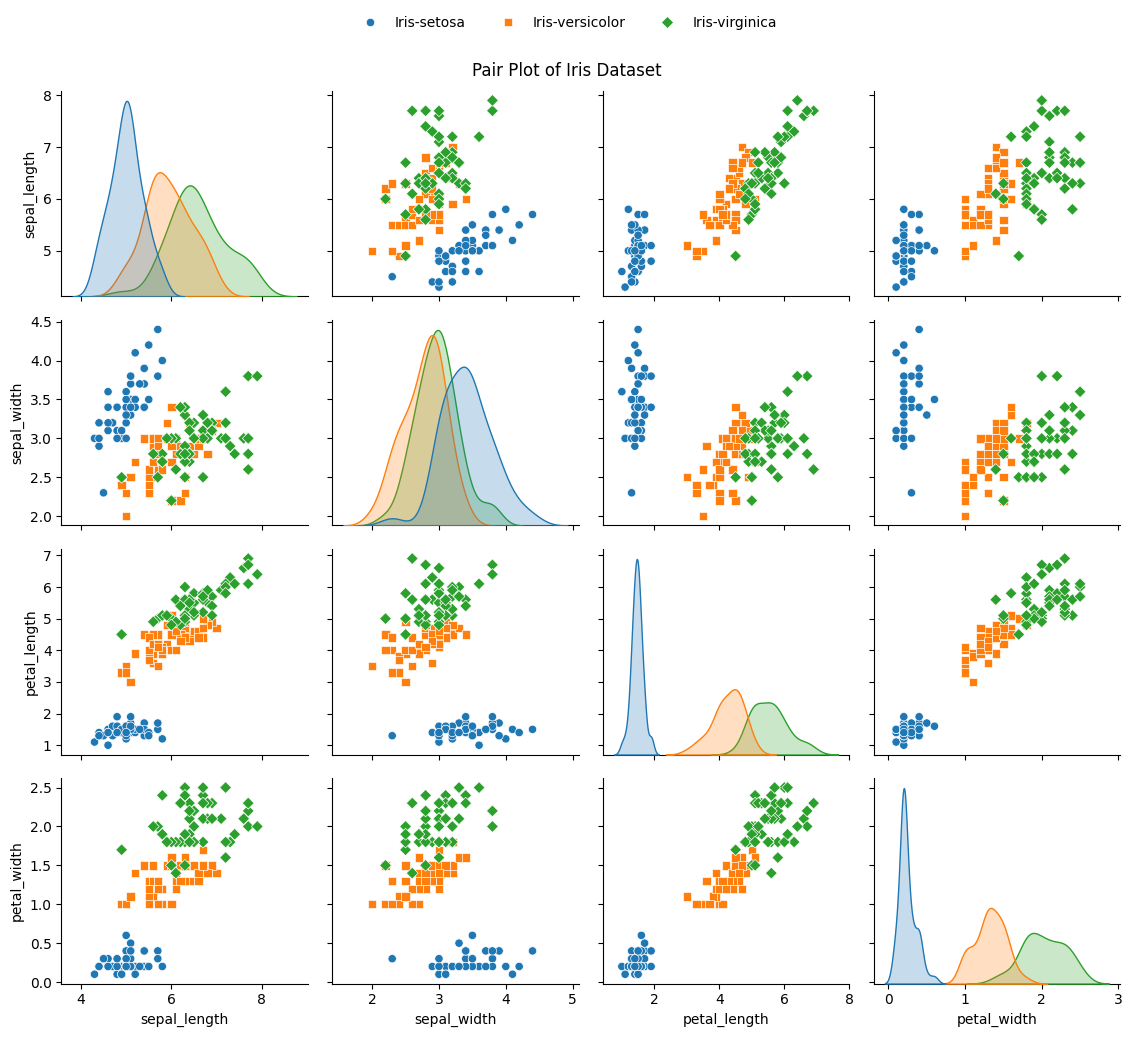

In [7]:
ax = sns.pairplot(iris, hue='Class', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Dataset")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

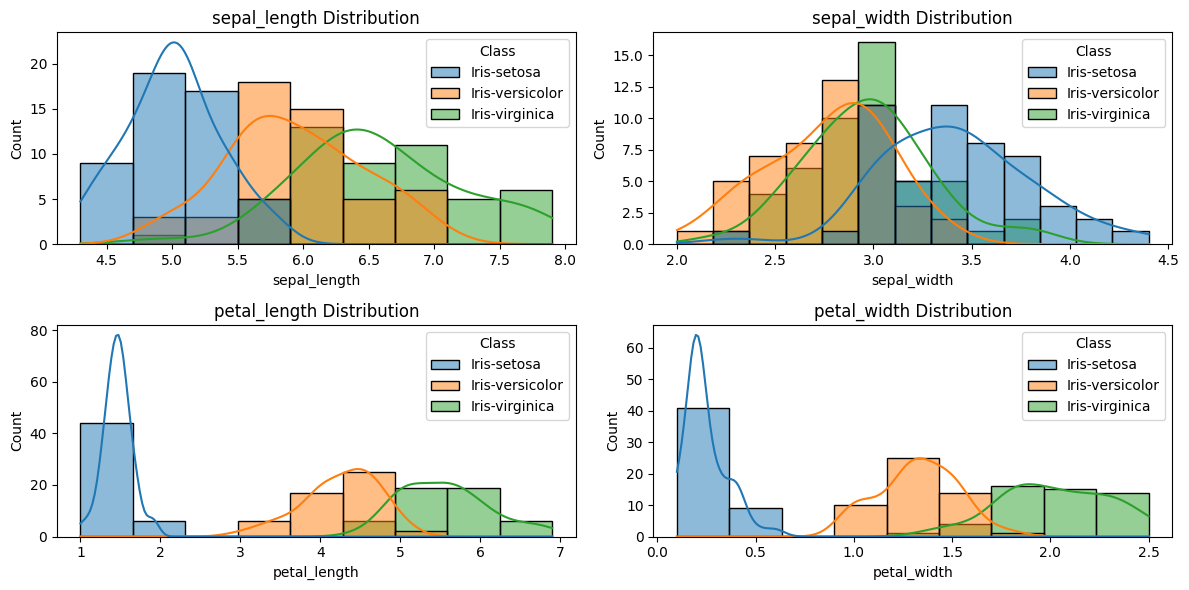

In [8]:
# Visualize the distribution of each feature using histograms.
plt.figure(figsize=(12, 6))
for i, feature in enumerate(columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris, x=feature, hue='Class', kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

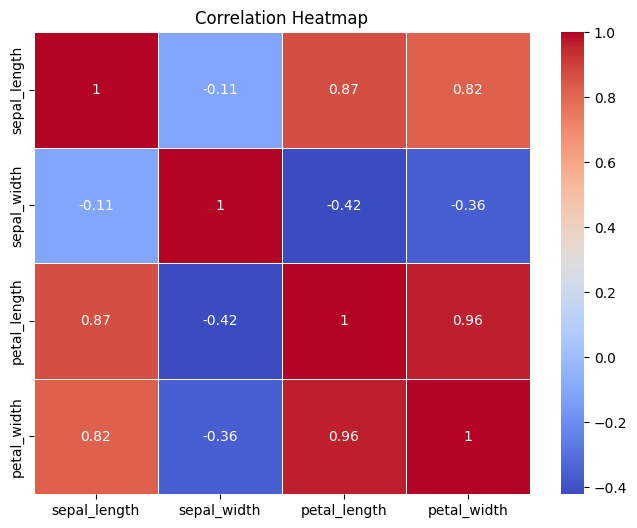

In [9]:
correlation_matrix = iris.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **Split dataset into training and testing sets**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=42)

# **Initialize the Gaussian Naive Bayes model**
# Train the model on the training data

In [15]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

#Predict the target for the test data
y_pred = gnb.predict(X_test)

# **Model Evaluation**

In [18]:
from sklearn.preprocessing import LabelEncoder

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=le.classes_)

# Display results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n",conf_matrix)
print("Classification Report:\n",  class_report)

Accuracy: 0.9777777777777777
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



Accuracy: 0.98


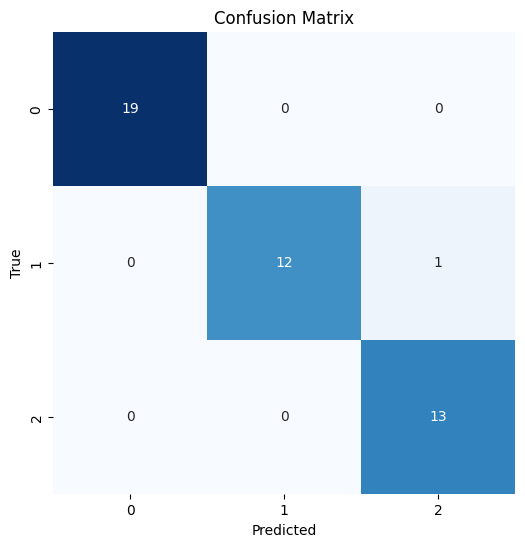

In [19]:
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

#Display the accuracy
print(f'Accuracy: {accuracy:.2f}')

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()